# Data Cleaning

This notebook consists of the following parts: <br>
1. Fix special characters when reading in the data <br>
2. Remove polluted rows of students that did not take the exercise seriously <br>
3. Label all unreadable <br> 
4. Remove outliers based on amount of unreadable words <br>
5. Remove outliers based on amount of words and grade <br>

In [7]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_colwidth', 1000)
sns.set_theme()

## Fixing special characters
There are two problems:
- When we read in the dataset as provided by Cito we encounter the � symbol. We therefore want to read in the txt files again, with ansi encoding.
- When we read in the txt files we encounter symbols like 'ï»¿', Ã© and '/n'. These can be filtered out.

In [8]:
# Read in csv and drop useless columns
df = pd.read_csv("data/data.csv")
df.drop(['line'], axis=1, inplace=True)

In [3]:
# Rename column
df.rename(columns={"T3F_54": "score"}, inplace=True)
df.head()

text  \
0                       De bewering van Kleenex is ongefundeerd aangezien haar bronnen niet controleerbaar zijn. De gebruikte sites en een samenwerkingsverband met Worchester University bieden beiden geen concrete antwoorden. De online bronnen waarop het merk zich beroept zijn weer afgeleidt aan sites die de beweringen niet ondersteunen of simpelweg onjuist zijn. Ook het maken van een nationale schatting naar hooikoorst is complex, aangezien het aantal niet wordt bijgehouden doordat het seizoensgebonden en vari�rend per jaar is en er geen dokstersbezoek nodig is. Het CMR bewaard sinds  de gediagnostiseerde hooikoorstgevallen waarbij in de periode - een stijging zichbaar is. Maar door de makkelijke behandelbaarheid biedt dit geen prevalentie onder de gehele bevolking. Ook de bewering dat de hooikoorst is verdubbeld blijkt ongegrond, want er zijn geen exacte cijfer in Nederland vanuit de laatste - jaar beschikbaar en dus kan worden vastgesteld dat het onderzoek van Kleenex ongefundeerd is.   
1  E�n op de vijf mensen heeft last van hooikoorts en dat aandeel groeit drastisch, aldus Kleenex. Deze beweringen zijn ongepundeerd. Zo worden als bronnen de EAACI, het KNMI en Allergie-site.nl genoemd. Laatsgenoemde bestaat niet meer, en de andere twee bronnen herkennen de informatie niet. Daarbij houdt niemand aantallen bij omdat deze seizoensgebonden zijn en vari�ren per jaar. Bij een onderzoek van het RIVM wordt geschat dat eenderde van de Nederlands bevolking last heeft van neusallergie. Dit biedt echter geen uitsluitsel aangezien er geen onderscheid wordt gemaakt tussen verschillende vormen. Ook zijn de cijfers van het CMR niet betrouwbaar omdat die uitgaan van doktersbezoeken, terwijl lang niet iedereen de dokter bezoekt. De bewering dat er een verdubbeling plaats heeft gevonden is daarbij ook nog onwaarschijnlijk, aangezien het aantal geregistreerde gevallen afneemt. Er zijn voor Nederland dus geen accurate cijfers beschikbaar, waardoor de bewering van Kleenex als ongepundeer...   
2                                                                                          Wij van next.checkt vinden de bewering van Kleenex ongefundeerd Kleenex stelt dat een op de vijf mensen last heeft van hooikoorst en dat het aantal drastisch groeit. Allereerst is het ongefundeerd omdat de bronnen van Kleenex niet achterhaalbaar zijn andere gegevens bevatten De dat de site eruit is. De Bronnen zijn dus niet te controleren Daarnaast zijn deze gegevens �berhaupt lastig vast te stellen Hooikoorts is moeilijk te meten aangezien het per seizoen en jaar verschillend is. Daarnaast hoef je ervoor niet naar de huisarts om een recept te krijgen voor medicijnen Vaak wordt er bij onderzoek naar dergelijke problemen geen onderscheid gemaakt tussen gewoon neusallergie door hooikoorts en door andere oorzaken. De uitspraak een op de vijf is niet onwaarschijnlijk. Het CMR rapporteert ook een stijging, maar dat het aantal drastisch groeit en er sprake is van verdubbeling lijkt vrij onwaarschijnlijk.   
3                                                    De bewering van Kleenex is ongefundeerd want het blijkt lastig om een schatting te maken van het aantal mensen met hooikoorts. Het Wordt niet bijgehouden en de klachten zijn seizoensgebonden De bronnen van Kleenex zijn niet controleerbaar Zo verzamelt de CMR door huisartsen gediagnosticeerde gevallen van hooikoorts, maar deze bieden geen uitsluitsel over prevalentie onder de gehele bevolking, omdat lang niet iedereen een huisarts bezoekt. Het RIVM schat dat eenderde last heeft van een neusallergie maar er wordt geen onderscheidt gemaakt tussen huiskoorts en andere vormen. Er heeft geen verdubbeling plaatsgevond want de groei van het aantal huisarts geregistreerde neemt af. Voor Nederland zijn er geen actuele cijfers beschikbaar over het aantal mensen met hooikoorts en het interne onderzoek van Kleenex is niet inzichtelijk gemaakt. Ook is de bewering van Kleenex tweeledig en blijft de vraag wanneer er eigenli

In [6]:
df.head()

text  \
0                       De bewering van Kleenex is ongefundeerd aangezien haar bronnen niet controleerbaar zijn. De gebruikte sites en een samenwerkingsverband met Worchester University bieden beiden geen concrete antwoorden. De online bronnen waarop het merk zich beroept zijn weer afgeleidt aan sites die de beweringen niet ondersteunen of simpelweg onjuist zijn. Ook het maken van een nationale schatting naar hooikoorst is complex, aangezien het aantal niet wordt bijgehouden doordat het seizoensgebonden en vari�rend per jaar is en er geen dokstersbezoek nodig is. Het CMR bewaard sinds  de gediagnostiseerde hooikoorstgevallen waarbij in de periode - een stijging zichbaar is. Maar door de makkelijke behandelbaarheid biedt dit geen prevalentie onder de gehele bevolking. Ook de bewering dat de hooikoorst is verdubbeld blijkt ongegrond, want er zijn geen exacte cijfer in Nederland vanuit de laatste - jaar beschikbaar en dus kan worden vastgesteld dat het onderzoek van Kleenex ongefundeerd is.   
1  E�n op de vijf mensen heeft last van hooikoorts en dat aandeel groeit drastisch, aldus Kleenex. Deze beweringen zijn ongepundeerd. Zo worden als bronnen de EAACI, het KNMI en Allergie-site.nl genoemd. Laatsgenoemde bestaat niet meer, en de andere twee bronnen herkennen de informatie niet. Daarbij houdt niemand aantallen bij omdat deze seizoensgebonden zijn en vari�ren per jaar. Bij een onderzoek van het RIVM wordt geschat dat eenderde van de Nederlands bevolking last heeft van neusallergie. Dit biedt echter geen uitsluitsel aangezien er geen onderscheid wordt gemaakt tussen verschillende vormen. Ook zijn de cijfers van het CMR niet betrouwbaar omdat die uitgaan van doktersbezoeken, terwijl lang niet iedereen de dokter bezoekt. De bewering dat er een verdubbeling plaats heeft gevonden is daarbij ook nog onwaarschijnlijk, aangezien het aantal geregistreerde gevallen afneemt. Er zijn voor Nederland dus geen accurate cijfers beschikbaar, waardoor de bewering van Kleenex als ongepundeer...   
2                                                                                          Wij van next.checkt vinden de bewering van Kleenex ongefundeerd Kleenex stelt dat een op de vijf mensen last heeft van hooikoorst en dat het aantal drastisch groeit. Allereerst is het ongefundeerd omdat de bronnen van Kleenex niet achterhaalbaar zijn andere gegevens bevatten De dat de site eruit is. De Bronnen zijn dus niet te controleren Daarnaast zijn deze gegevens �berhaupt lastig vast te stellen Hooikoorts is moeilijk te meten aangezien het per seizoen en jaar verschillend is. Daarnaast hoef je ervoor niet naar de huisarts om een recept te krijgen voor medicijnen Vaak wordt er bij onderzoek naar dergelijke problemen geen onderscheid gemaakt tussen gewoon neusallergie door hooikoorts en door andere oorzaken. De uitspraak een op de vijf is niet onwaarschijnlijk. Het CMR rapporteert ook een stijging, maar dat het aantal drastisch groeit en er sprake is van verdubbeling lijkt vrij onwaarschijnlijk.   
3                                                    De bewering van Kleenex is ongefundeerd want het blijkt lastig om een schatting te maken van het aantal mensen met hooikoorts. Het Wordt niet bijgehouden en de klachten zijn seizoensgebonden De bronnen van Kleenex zijn niet controleerbaar Zo verzamelt de CMR door huisartsen gediagnosticeerde gevallen van hooikoorts, maar deze bieden geen uitsluitsel over prevalentie onder de gehele bevolking, omdat lang niet iedereen een huisarts bezoekt. Het RIVM schat dat eenderde last heeft van een neusallergie maar er wordt geen onderscheidt gemaakt tussen huiskoorts en andere vormen. Er heeft geen verdubbeling plaatsgevond want de groei van het aantal huisarts geregistreerde neemt af. Voor Nederland zijn er geen actuele cijfers beschikbaar over het aantal mensen met hooikoorts en het interne onderzoek van Kleenex is niet inzichtelijk gemaakt. Ook is de bewering van Kleenex tweeledig en blijft de vraag wanneer er eigenli

In [7]:
# Get folder from examen column
df['folder'] = [re.split('-| ',i)[0] for i in df.examen]

In [8]:
df.head()

text  \
0                       De bewering van Kleenex is ongefundeerd aangezien haar bronnen niet controleerbaar zijn. De gebruikte sites en een samenwerkingsverband met Worchester University bieden beiden geen concrete antwoorden. De online bronnen waarop het merk zich beroept zijn weer afgeleidt aan sites die de beweringen niet ondersteunen of simpelweg onjuist zijn. Ook het maken van een nationale schatting naar hooikoorst is complex, aangezien het aantal niet wordt bijgehouden doordat het seizoensgebonden en vari�rend per jaar is en er geen dokstersbezoek nodig is. Het CMR bewaard sinds  de gediagnostiseerde hooikoorstgevallen waarbij in de periode - een stijging zichbaar is. Maar door de makkelijke behandelbaarheid biedt dit geen prevalentie onder de gehele bevolking. Ook de bewering dat de hooikoorst is verdubbeld blijkt ongegrond, want er zijn geen exacte cijfer in Nederland vanuit de laatste - jaar beschikbaar en dus kan worden vastgesteld dat het onderzoek van Kleenex ongefundeerd is.   
1  E�n op de vijf mensen heeft last van hooikoorts en dat aandeel groeit drastisch, aldus Kleenex. Deze beweringen zijn ongepundeerd. Zo worden als bronnen de EAACI, het KNMI en Allergie-site.nl genoemd. Laatsgenoemde bestaat niet meer, en de andere twee bronnen herkennen de informatie niet. Daarbij houdt niemand aantallen bij omdat deze seizoensgebonden zijn en vari�ren per jaar. Bij een onderzoek van het RIVM wordt geschat dat eenderde van de Nederlands bevolking last heeft van neusallergie. Dit biedt echter geen uitsluitsel aangezien er geen onderscheid wordt gemaakt tussen verschillende vormen. Ook zijn de cijfers van het CMR niet betrouwbaar omdat die uitgaan van doktersbezoeken, terwijl lang niet iedereen de dokter bezoekt. De bewering dat er een verdubbeling plaats heeft gevonden is daarbij ook nog onwaarschijnlijk, aangezien het aantal geregistreerde gevallen afneemt. Er zijn voor Nederland dus geen accurate cijfers beschikbaar, waardoor de bewering van Kleenex als ongepundeer...   
2                                                                                          Wij van next.checkt vinden de bewering van Kleenex ongefundeerd Kleenex stelt dat een op de vijf mensen last heeft van hooikoorst en dat het aantal drastisch groeit. Allereerst is het ongefundeerd omdat de bronnen van Kleenex niet achterhaalbaar zijn andere gegevens bevatten De dat de site eruit is. De Bronnen zijn dus niet te controleren Daarnaast zijn deze gegevens �berhaupt lastig vast te stellen Hooikoorts is moeilijk te meten aangezien het per seizoen en jaar verschillend is. Daarnaast hoef je ervoor niet naar de huisarts om een recept te krijgen voor medicijnen Vaak wordt er bij onderzoek naar dergelijke problemen geen onderscheid gemaakt tussen gewoon neusallergie door hooikoorts en door andere oorzaken. De uitspraak een op de vijf is niet onwaarschijnlijk. Het CMR rapporteert ook een stijging, maar dat het aantal drastisch groeit en er sprake is van verdubbeling lijkt vrij onwaarschijnlijk.   
3                                                    De bewering van Kleenex is ongefundeerd want het blijkt lastig om een schatting te maken van het aantal mensen met hooikoorts. Het Wordt niet bijgehouden en de klachten zijn seizoensgebonden De bronnen van Kleenex zijn niet controleerbaar Zo verzamelt de CMR door huisartsen gediagnosticeerde gevallen van hooikoorts, maar deze bieden geen uitsluitsel over prevalentie onder de gehele bevolking, omdat lang niet iedereen een huisarts bezoekt. Het RIVM schat dat eenderde last heeft van een neusallergie maar er wordt geen onderscheidt gemaakt tussen huiskoorts en andere vormen. Er heeft geen verdubbeling plaatsgevond want de groei van het aantal huisarts geregistreerde neemt af. Voor Nederland zijn er geen actuele cijfers beschikbaar over het aantal mensen met hooikoorts en het interne onderzoek van Kleenex is niet inzichtelijk gemaakt. Ook is de bewering van Kleenex tweeledig en blijft de vraag wanneer er eigenli

In [9]:
# We read the txt files again for every row
for n,i in df.iterrows():
    folder = i.folder
    file = i.examen
    text = open(f"data/responses/{folder}/{file}", encoding='ansi').read()
    df.at[n,'text'] = text

In [10]:
# This looks good, the � is gone.
df[df.id == 'P2']

text  \
1  Eén op de vijf mensen heeft last van hooikoorts en dat aandeel groeit drastisch, aldus Kleenex. Deze beweringen zijn ongepundeerd. Zo worden als bronnen de EAACI, het KNMI en Allergie-site.nl genoemd. Laatsgenoemde bestaat niet meer, en de andere twee bronnen herkennen de informatie niet. Daarbij houdt niemand aantallen bij omdat deze seizoensgebonden zijn en variëren per jaar. Bij een onderzoek van het RIVM wordt geschat dat eenderde van de Nederlands bevolking last heeft van neusallergie. Dit biedt echter geen uitsluitsel aangezien er geen onderscheid wordt gemaakt tussen verschillende vormen. Ook zijn de cijfers van het CMR niet betrouwbaar omdat die uitgaan van doktersbezoeken, terwijl lang niet iedereen de dokter bezoekt. De bewering dat er een verdubbeling plaats heeft gevonden is daarbij ook nog onwaarschijnlijk, aangezien het aantal geregistreerde gevallen afneemt. Er zijn voor Nederland dus geen accurate cijfers beschikbaar, waardoor de bewering van Kleenex als ongepundeer...   

              examen schooltype  id toets_id  school_id  leerling_id  T3F_54  \
1  T81-210040100.txt        vwo  P2      T81         80          100      13   

  folder  
1    T81

In [11]:
# This does not look good, we now have 'ï»¿', Ã© and '/n'.
df[(df.id == 'P591') | (df.id == 'P613')]

text  \
676                                  ï»¿Het stijging van hooikoorts in 2010 met 10% gestegen van 5% naar 15%. 1/3 van de bevolking heeft er last van. in 1985 was 1 op de 100 vrouwen en 1,4 van de mannen hebben hooikoorts. Er is een verdubbeling in de laatste 10-15 jaar. 24,2% van Nederland heeft een ademhalings allergie. in 2006 was het 3,4 van de 100 vrouwen en 2,5 van de 100 mannen allergisch voor hooikoorts.\n   
709  ï»¿Ã©Ã©n op de vijf mensen heeft last van hooikoorts en dat aantal groeit drastisch de bewering van Kleenex is ongefundeerd omdat ze vinden dat er iets tegen moet worden gedaan want de medicijnen die de meeste huisartsen opgeven helpen niet. Ze vinden dus dat ze een gepaste medicijn moeten uitvinden die zowel snel als goed functioneerd en die mensen die er last van hebben en ook geen last meer van krijgen.\n   

                examen schooltype    id toets_id  school_id  leerling_id  \
676  T47-213520002.txt         gt  P591      T47         54            2   
709  T47-295660003.txt         gt  P613      T47         44            3   

     T3F_54 folder  
676       0    T47  
709       0    T47

In [12]:
# Filter out 'ï»¿' and '/n', and replace Ã© by é
df = df.replace('\n',' ', regex=True)
df = df.replace('ï»¿','', regex=True)
df = df.replace('Ã©','é', regex=True)
df[df.id == 'P613'].text.values

array(['één op de vijf mensen heeft last van hooikoorts en dat aantal groeit drastisch de bewering van Kleenex is ongefundeerd omdat ze vinden dat er iets tegen moet worden gedaan want de medicijnen die de meeste huisartsen opgeven helpen niet. Ze vinden dus dat ze een gepaste medicijn moeten uitvinden die zowel snel als goed functioneerd en die mensen die er last van hebben en ook geen last meer van krijgen. '],
      dtype=object)

In [13]:
# Save this new csv
df.to_csv("data/data_cleaned.csv", index=False)

In [44]:
# Now if we load the file all looks good
df = pd.read_csv('data/data_cleaned.csv')
df[(df.id == 'P591') | (df.id == 'P2') | (df.id == 'P613')].text.values

array(['Eén op de vijf mensen heeft last van hooikoorts en dat aandeel groeit drastisch, aldus Kleenex. Deze beweringen zijn ongepundeerd. Zo worden als bronnen de EAACI, het KNMI en Allergie-site.nl genoemd. Laatsgenoemde bestaat niet meer, en de andere twee bronnen herkennen de informatie niet. Daarbij houdt niemand aantallen bij omdat deze seizoensgebonden zijn en variëren per jaar. Bij een onderzoek van het RIVM wordt geschat dat eenderde van de Nederlands bevolking last heeft van neusallergie. Dit biedt echter geen uitsluitsel aangezien er geen onderscheid wordt gemaakt tussen verschillende vormen. Ook zijn de cijfers van het CMR niet betrouwbaar omdat die uitgaan van doktersbezoeken, terwijl lang niet iedereen de dokter bezoekt. De bewering dat er een verdubbeling plaats heeft gevonden is daarbij ook nog onwaarschijnlijk, aangezien het aantal geregistreerde gevallen afneemt. Er zijn voor Nederland dus geen accurate cijfers beschikbaar, waardoor de bewering van Kleenex als ongepun

## Missing values

In [45]:
# There are no obvious missing values (NA's) in the data
df.isnull().sum()

text             0
examen           0
schooltype       0
id               0
toets_id         0
school_id        0
leerling_id      0
T3F_54           0
folder           0
word_count       0
nr_unreadable    0
dtype: int64

## Polluted values
### Grade is zero
When we plot a histogram of the grades we see there are a lot of value with grade 0. Some of these contains answers that were not taken seriously by the students. Those should be removed from the dataset.

<AxesSubplot:xlabel='T3F_54', ylabel='Count'>

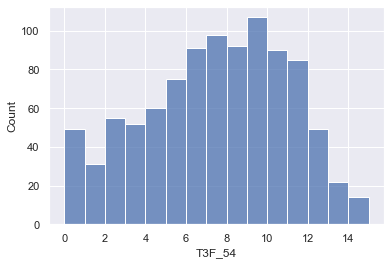

In [16]:
# Plot histogram of grade
sns.histplot(data=df, x="T3F_54", bins=15)

In [17]:
df[df.T3F_54 == 0]

text  \
258                                                                                                                                                                                                                                                                                                                                                                                                                    Er was eens een grote olifant. Enerom beest. Grote poten, lange slurf Man, wat een olifant. Bwooap! Daar kwam de olifant van Stamp Stamp Stamp deden de poten van de olifant. Openeen kwam er een dinosaurus. Eeeeergh! Fluisterde de dino en nog eens eeeeeergh! De olifant schrok zo erg dat ie jankend wegrende. Iedereen stierf. Einde   
298                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     Te weinig tijd, zie arcering. Dit zou ik natuurlijk niet allemaal kunnen gebruiken i.v.m. aantal woorden.   
300                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       Mjn tijd is op! Ik heb veel  gearceerd. Een deel hiervan zou ik voor mijn samenvatting hebben gebruikt.   
302                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   Ik heb te weinig tijd gehad. Zie de arceringen in de tekst.   
342                                                                                                                                                                                                                                                                                                                                                                                                                                                          Knmi heeft geen Hooikoorts cijfers. Niemand houdt de aantallen bij, want de klachten zijn seizoens gebonden en variëren per jaar. lang niet iedereen bezoekt de huisarts vanwege hooi-koortsklachten voor nederland zijn er geen accurate cijfers beschikbaar over het aantal mensen met hooikoorts.   
354                                                                                                                                                                                                                                                                                            

In [18]:
# Examples of polluted values
df[(df.text.str.contains('weinig tijd')) | (df.text.str.contains('tijd is op')) | (df.text.str.contains('Snap'))]

text  \
298  Te weinig tijd, zie arcering. Dit zou ik natuurlijk niet allemaal kunnen gebruiken i.v.m. aantal woorden.   
300    Mjn tijd is op! Ik heb veel  gearceerd. Een deel hiervan zou ik voor mijn samenvatting hebben gebruikt.   
302                                                Ik heb te weinig tijd gehad. Zie de arceringen in de tekst.   
680                                                                                               Snap ik al.    
685                                                                                          Snap er niks van    

                examen schooltype    id toets_id  school_id  leerling_id  \
298  T83-228810172.txt        vwo  P299      T83         76          172   
300  T83-228810174.txt        vwo  P301      T83         76          174   
302  T83-228810176.txt        vwo  P303      T83         76          176   
680  T47-224001053.txt         gt  P709      T47         52           53   
685  T47-224001059.txt         gt  P714      T47         52           59   

     T3F_54 folder  
298       0    T83  
300       0    T83  
302       0    T83  
680       0    T47  
685       0    T47

In [19]:
rows_to_remove=[258, 298, 300, 302, 355, 407, 413, 418, 646, 680, 685]
df.drop(rows_to_remove, inplace=True)

### Word count is very low
When we make a histogram of the word count per answer there also seem to be a lot with less then 100 characters. After inspecting those manually, a few answers of students that not take the exercise seriously, or ansers that were not readable, were removed. Some of these answers even scored points.

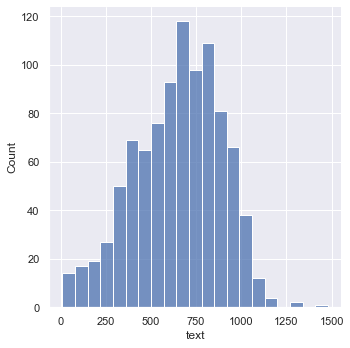

In [20]:
# Plot distribution plot of text length
sns.displot(df.text.str.len())

In [21]:
df[df.text.str.len() < 100]

text  \
354   Hooikoorts stijgt met 5 a7 procent per jaar op Het moment Heeft 20 procent van de nl Hooikoorts.   
414                                    het aantal mensen in nederland met hooikoorts groeit drastisch.   
496                                                       Hooikoorts wordt een steeds groter probleem.   
513                                   Kleenex heeft valse cijfers gebruikt om haar product te promoten   
514                                                                         Tekst vraag 33 onleesbaar.   
518                                                                     Hooikoorts bereikt hoogtepunt.   
520                                                                                         onleesbaar   
552                                                                                    "niet leesbare"   
576                                                                                    "niet leesbaar"   
618                                                                                    "Niet leesbaar"   
677  de argumenten zijn ongefundeerd. Omdat je ze niet kan controleren dus weet je niet of het klopt.    
703                                                                      Hooikoorts in niet fijn.....    
704              Volgens de woordvoerder van Kleenex zijn de uitspraken gebaseerd op eigen onderzoek.    
737                                        is gebaaseerd op eigen onderzoek en niet kan worden gedeeld   
885                                                                 Kleenex heeft een bewering gedaan;   
953                            een op de vijf mensen heeft hooikoorts en het aantal groeit drastische.   
963                             een op de vijf mensen heeft hooikoorts en dat aantal stijgt drastisch.   

                  examen schooltype    id toets_id  school_id  leerling_id  \
354   T101-101700014.txt        mbo  P894     T101        272           14   
414   T103-101700119.txt        mbo  P949     T103        272          119   
496  T66 - 279840094.txt       havo  P411      T66         65           94   
513  T66 - 456560018.txt       havo  P428      T66         72           18   
514  T66 - 456560019.txt       havo  P429      T66         72           19   
518  T66 - 456560024.txt       havo  P433      T66         72           24   
520  T68 - 185140173.txt       havo  P435      T68         57          173   
552  T68 - 211230316.txt       havo  P467      T68         40          316   
576  T68 - 218210007.txt       havo  P491      T68         69            7   
618  T68 - 238390066.txt       havo  P533      T68         74           66   
677    T47-213520003.txt         gt  P592      T47         54            3   
703    T47-279840031.txt         gt  P607      T47         65           31   
704    T47-279840033.txt         gt  P608      T47         65           33   
737    T47-302360010.txt         gt  P641      T47         55           10   
885    T49-281211017.txt         gt  P870      T49         53           17   
953    T49-477660059.txt         gt  P839      T49         66           59   
963    T49-477660070.txt         gt  P849      T49         66           70   

     T3F_54 folder  
354       0   T101  
414       0   T103  
496       0    T66  
513       0    T66  
514       4    T66  
518       0    T66  
520       9    T68  
552       7    T68  
576       1    T68  
618      11    T68  
677       0    T47  
703       0    T47  
704       1    T47  
737       2    T47  
885       0    T49  
953       0    T49  
963       0    T49

In [22]:
rows_to_remove=[514, 520, 552, 576, 618]
df.drop(rows_to_remove, inplace=True)

### "niet leesbaar"
It has come to my attention that the transcribers have used 'niet leesbaar' or 'onleesbaar' (or something similar) whenever something was not readable for them. These strings are replaced by UNREADABLE so we can use it in the analysis later.

In [9]:
# The following strings were found by looking for words like 'onherkenbaar' and 'leesbaar'
strings_to_replace = ["niet leesbaar", "neit leesbaar", "(eerste zin onleesbaar)", "(twee woorden onleesbaar)", "onherkenbaar woord", "(onherkenbaar woord)","onleesbaar", '(onherkenbaar woord 2x)']
unreadable_string = 'UNREADABLE'

for string_to_replace in strings_to_replace:
    df['text'] = df['text'].str.replace(string_to_replace, unreadable_string , regex=True, case=False)

## Outliers

### Outliers based on word count and grade

In [6]:
# Add word count column
df['word_count'] = df.text.str.split().str.len()

<AxesSubplot:xlabel='word_count', ylabel='T3F_54'>

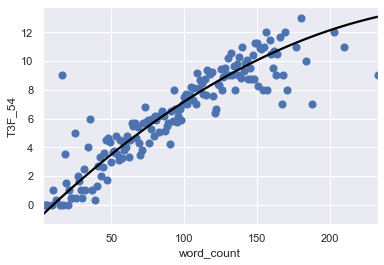

In [25]:
# Plot word count vs grade.
sns.regplot(y=df.T3F_54, x=df.word_count, x_estimator=np.mean,
                 order=2, ci=None, line_kws={"color": "black"})

Text(0, 0.5, 'Word count')

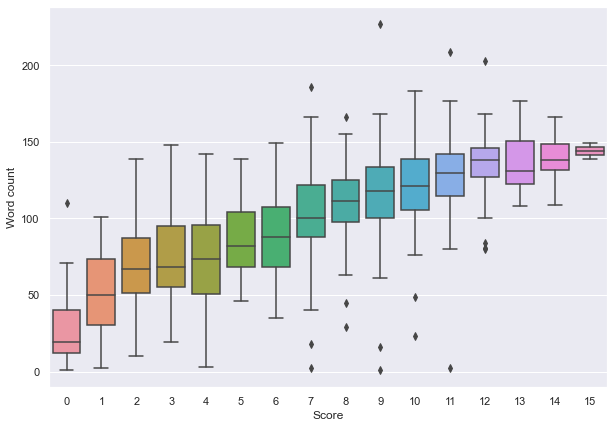

In [10]:
# There seem to be some outliers, lets visualise those using a boxplot
fig, ax = plt.subplots(figsize=(10, 7))
plot = sns.boxplot(x="score", y="word_count", data=df, ax=ax)
plt.xlabel('Score')
plt.ylabel('Word count')

In [27]:
# There are some students who scored very high with very little words, lets inspect those. 
# It looks like these grades do not really match the texts, mostly because the transcriber couldn't read the texts (and the grader maybe was able to).
df[(df.word_count < 60) & (df.T3F_54 > 7)]

text  \
39                                                                                                                                                                                                                                                                 Kleenex beweerd op basis van eigen onderzoek in samenwerking met de University of Worcester dat 1 op de 5 mensen last heeft van hooikoorts en    
394                     Het zijn argumenten van Kleenex gebaseerd op eigen onderzoek wat niet mag worden gedeeld. Ze gebruiken als bron Allergie-site.nl en deze site bestaat niet meer. De klachten van hooikoorts zijn bovendien seizoensgebonden, medicijnen zijn zonder doktersrecept verkrijgbaar en aantallen worden nooit bijgehouden. Ook verwarren ze verschillende ademhalingsallergiën met hooikoorts.   
397                                                                                                               De uitslagen die er zijn, zijn gebasseerd op onderzoeken die in de jaren gedaan zijn binnen bepaalde landen. Het is seizoensgebonden en dus niemans kan de klachten bijhouden die er zijn. Er moet een onderscheid gemaakt worden tussen de klachten van hooikoorts en hyperreactieve rhinitis.   
481                                                                                                                                                                                                                                                                                                 Het oordeel van nect-.checkt is ongefundeerd. De bronnen die zijn gebruikt....rest van de tekst is UNREADABLE   
524  Zakdoekjesproducent kleenex beweert dat één op de vijf mensen last van hooikoorts heeft en dat dit aantal drastisch groeit. Volgens een woordvoerder van Kleenex is dit gebasseerd op eigen onderzoek. De gebruikte bronnen klijken deze cijfers niet te hebben.  Ook blijkt het "UNREADABLE" lastig om "UNREADABLE" te maken van "UNREADABLE" hooikorts "UNREADABLE" "UNREADABLE" de klachten "UNREADABLE"    
528                                                                                                                                                                                                   Volgens het bedrijf Kleenex hebben op dit moment 1 op 5 mensen last van hooikoorts "UNREADABLE" in Nederland en dat aantal is nog steeds "UNREADABLE". Als je dit "UNREADABLE"  "UNREADABLE"  "UNREADABLE"    

                  examen schooltype    id toets_id  school_id  leerling_id  \
39     T81-220220053.txt        vwo   P40      T81         75           53   
394   T103-100200055.txt        mbo  P940     T103        254           55   
397   T103-100500020.txt        mbo  P961     T103        275           20   
481  T66 - 228810073.txt       havo  P396      T66         76           73   
524  T68 - 185140178.txt       havo  P439      T68         57          178   
528  T68 - 185140184.txt       havo  P443      T68         57          184   

     T3F_54 folder  word_count  
39       10    T81          25  
394      10   T103          49  
397       8   T103          45  
481       9    T66          16  
524       9    T68          56  
528       8    T68          31

In [28]:
# There is a student who scored 0 with more than 100 words. This does not seem right either.
df[(df.word_count > 100) & (df.T3F_54 == 0)]

text  \
669  Kleenex beweert dat 20% van de Nederlandse bevolking hooikoorts heeft. Bronnen zoals het EAACI en het KNMI kunnen niet bevestigen dat deze cijfers van hun komen. Sowizo is het erg lastig om een schatting te maken over het aantal personen met hooikoorts. De aantallen worden niet bijgehouden en niet eidereen gaat naar de dokter. In een onderzoek van de World Allergy Organisation is gebleken dat 24,2 procent van de Nederlanders een ademhalingsallergie heeft. Er zijn echter ook "UNREADABLE" zo veel ondere alleergieën dat het onwaarschijnlijk dat 20% hoikoorts heeft. Uitdeze feiten blijkt uiteindelijk, dat de bronnen van Kleenex niet oncontroleerbaar zijn. "UNREADABLE" beoordeelt next.checkt de uitspraak als ongefundeerd.   

                  examen schooltype    id toets_id  school_id  leerling_id  \
669  T68 - 465180162.txt       havo  P584      T68         58          162   

     T3F_54 folder  word_count  
669       0    T68         108

In [29]:
# There are also some people who used way to many words and still scored quite high.
df[(df.word_count > 200) & (df.T3F_54 > 8)]

text  \
91   Samenvatting van 'Next checkt'. Eén op de vijf mensen heeft hooikoorts en dat aantal stijgt drastisch'. NRC next, Thomas Rueb. Next checkt vindt de uitspraak van Kleenex, tevens de titel van het artikel, ongefundeerd. Hier geven zij een aantal argumenten voor. Volgens een woordvoerder zijn de uitspraken gebaseerd op de resultaten van eigen onderzoek. ook worden er cijfers uit bronnen gehaald, maar woordvoerders van deze bronnen zeggen de cijfers niet te herkennen. Die is gebeurd met ond andere de bronnen EAACI, en het KNMI. Verder wordt gezegd dat één op de vijf Nederlanders hooikoorts heeft. Maar volgens de tekst is dit aantal onmogelijk te controleren. De klachten zijn seizoensgebonden en variëren per jaar. Ook gaan maar weinig mensen met hooikoorts naar de huisarts omdat medicijnen ook zonder recept verkrijgbaar zijn. Verder is het lastig om te bepalen wanneer de klachten op hooikoorts wijzen: er zijn klachten er sterk op lijken maar het hele jaar voorkomt en dit is geen hooikoo...   
163  De bewering van Kleenex wordt beoordeelt als ongefundeerd Kleenex gebruikt als bron de EAACI en Allergie-site.nl. De laatste site bestaat niet meer en het EACCI zegt het cijfer niet te herkennen. Een andere bron is een persbericht van Bihorma waarin cijfers van het KNMI zouden staan, maar het KNMI zegt geen hooikoortscijfers te hebben. Verder is het lastig om een schatting te maken van het aantal hooikoortspatiënten, want niemand houdt de aantallen bij. De klachten zijn namelijk siezoensgebonden en variëren per jaar. Het Nationaal Kompas Volksgezondheid van het RIVM schat dat ongeveer eenderde van de Nederlandse bevolking last heeft van een neusallergie, maar daarbij wordt geen onderscheid gemaakt tussen hooikoorts en andere vormen. In Nederland verzamelt CMR door huisarts gediagnosticeerde gevallen van hooikoorts. Die bieden echter geen uitsluitsel over prevalentie onder de gehele bevolking, want lang niet iedereen bezoek de huisarts. Het is al met al niet mogelijk om de ptrevalen...   
847  Eén op de vijf mensen heeft last van hooikoorts en dat aantal groeit drastisch. men spreekt zelfs van een verdubbeling in de laatste 10-15 jaar volgens een woordvoerder van Kleenex zijn de uitspraken gebaseerd op eigen onderzoek in samenwerking met de University of Wordcester dat uitsluitend voor intern gebruik is, en niet kan worden gedeeld. In het artikel van Gezondheidsnet.nl wordt, net als in de advertentie, gesteld dat 20 procent van de Nederlanders last heeft van hooikoorts en dat het een groot, groeiend probleem is. Het persbericht van Biohorma spreekt van een stijging van het aantal hooikoortspatienten in Nederland van 5 procent in 1980 naar 15 procent in 2010 Het blijkt echter bijzonder lastig om een schatting te maken van het aantal mensen met hooikoorts. Niemand houdt de aantallan bij, want de klachten zijn seizoensgebond en variëren per jaar Hooikoorts komt voor in de lenten en vroege zomer. Als iemand het hele kaar klaagt van hooikoorts, is het geen hooikoorts maar 'hy...   

                examen schooltype    id toets_id  school_id  leerling_id  \
91   T81-227390249.txt        vwo   P92      T81         71          249   
163  T81-293640349.txt        vwo  P164      T81         36          349   
847  T49-279450006.txt         gt  P751      T49         64            6   

     T3F_54 folder  word_count  
91       11    T81         210  
163      12    T81         203  
847       9    T49         233

Based on the manual inspections above we can conclude that the outlying values might have a negative effect on our model. We therefore apply the 1.5*IQR rule to identify outliers. Outliers are removed from the dataset.

See: https://blogs.sas.com/content/sgf/2020/07/14/adjusting-outliers-with-the-1-5-iqr-rule/ 

In [30]:
# Calculate Q1 and Q3 word count for each grade
# Then use these to calculate upper and lower limit
outlier_limits_per_grade = {}

for i in range(0,16):
    Q1 = df[df.T3F_54 == i].word_count.quantile(.25)
    Q3 = df[df.T3F_54 == i].word_count.quantile(.75)
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5*IQR
    upper_limit = Q3 + 1.5*IQR

    outlier_limits_per_grade[i] = (lower_limit, upper_limit)

outlier_limits_per_grade

{0: (-20.125, 78.875),
 1: (-30.875, 138.125),
 2: (3.5, 139.5),
 3: (-7.0, 161.0),
 4: (-15.5, 164.5),
 5: (12.25, 162.25),
 6: (8.75, 170.75),
 7: (35.5, 175.5),
 8: (59.375, 164.375),
 9: (52.125, 183.125),
 10: (55.375, 190.375),
 11: (75.5, 183.5),
 12: (99.5, 175.5),
 13: (81.875, 192.875),
 14: (104.25, 176.25),
 15: (135.0, 155.0)}

In [31]:
# Use the lower and upper limit per grade to detect outliers.
def is_outlier(grade, word_count):
    lower_limit = outlier_limits_per_grade[grade][0]
    upper_limit = outlier_limits_per_grade[grade][1]

    if (word_count > lower_limit and word_count < upper_limit):
        return False
    else:
        return True

In [32]:
# Apply the function to each row
df['outlier'] = df.apply(lambda row: is_outlier(row.T3F_54, row.word_count), axis=1)

In [33]:
# We identify 18 outliers, this is expected
print(f"Number of outliers detected: {df.outlier.sum()}")

# Remove the outliers from the dataframe
df = df[df.outlier == False]

Number of outliers detected: 18


In [34]:
# Drop the outlier columns
df.drop(['outlier'], axis=1, inplace=True)

### Outliers based on unreadable words

In [10]:
# Count how many unreadable words there are per text
df['nr_unreadable'] = df.text.str.count("UNREADABLE")

<AxesSubplot:xlabel='T3F_54', ylabel='nr_unreadable'>

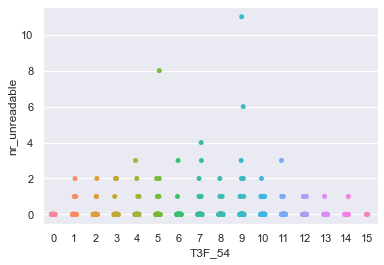

In [36]:
# Plot nr_unreadable vs grade.
sns.stripplot(x=df.T3F_54, y=df.nr_unreadable, jitter=True)

<AxesSubplot:>

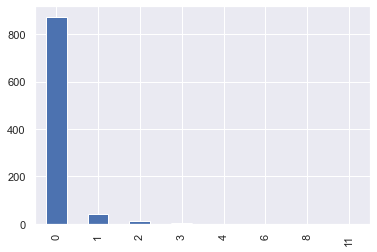

In [37]:
df.nr_unreadable.value_counts().plot(kind='bar')

In [23]:
# Luckily, most text have 0 to 1 unreadable words. 
# (However, sometimes the whole text is unreadable! So the word unreadable is there only once!)
# Since it is unsure whether these words were also unreadable for the grader (or just the transcriber), entries with more than 1 unreadable words will be removed
df = df[df.nr_unreadable < 2]

## Save cleaned DF

In [39]:
# Save this new csv
df.to_csv("data/data_cleaned.csv", index=False)